# Project: Wrangling and Analyze Data

## Import Libraries 
In the cell below, we import **all** the libraries required for this project.

In [221]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import seaborn as sns
import datetime

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [222]:
twitter_archive_df = pd.read_csv('twitter-archive-enhanced.csv') # Direct download of the WeRateDogs Twitter archive data, and store inside a pandas dataframe

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [223]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
image_predictions_response = requests.get(url, allow_redirects = True)

with open('image-predictions.tsv', mode='wb') as file:
  file.write(image_predictions_response.content)

image_predictions_df = pd.read_csv('image-predictions.tsv', sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [224]:
# Since my Twitter Developer account approval is pending, 
# I will be reading the data directly from the tweet-json.json file
tweet_data = pd.read_json('tweet-json.json', lines=True)
tweet_data = tweet_data.filter(['id', 'favorite_count', 'retweet_count'])
tweet_data = tweet_data.rename(columns={"id":"tweet_id"})
tweet_data.to_csv('tweet_data.csv')

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### i. Accessing the twitter archive data

In [225]:
twitter_archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [226]:
# # Number of retweeted tweets
# len(twitter_archive_df[twitter_archive_df['retweeted_status_id'].notnull()])

In [227]:
twitter_archive_df.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
692,787111942498508800,NaN,NaN,2016-10-15 02:04:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Carl. He's very powerfu...,7.529324e+17,4.196984e+09,2016-07-12 18:27:35 +0000,"https://vine.co/v/OEppMFbejFz,https://vine.co/...",12,10,Carl,None,None,None,None
2054,671390180817915904,NaN,NaN,2015-11-30 18:07:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Striped dog here. Having fun playing on back. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671390180...,7,10,None,None,None,None,None
992,748692773788876800,NaN,NaN,2016-07-01 01:40:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",That is Quizno. This is his beach. He does not...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/748692773...,10,10,his,doggo,None,None,None
2015,672205392827572224,NaN,NaN,2015-12-03 00:07:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Opal. He's a Royal John Coctostan. Rea...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672205392...,9,10,Opal,None,None,pupper,None
1314,706901761596989440,NaN,NaN,2016-03-07 17:58:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Elliot. He's blocking the roadway. Dow...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/706901761...,3,10,Elliot,None,None,None,None
254,844580511645339650,NaN,NaN,2017-03-22 16:04:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Charlie. He wants to know if you have ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/844580511...,11,10,Charlie,None,None,None,None
1343,704761120771465216,NaN,NaN,2016-03-01 20:11:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This pupper killed this great white in an epic...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704761120...,13,10,None,None,None,pupper,None
1758,678755239630127104,NaN,NaN,2015-12-21 01:53:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Dash. He didn't think the water would ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678755239...,10,10,Dash,None,None,None,None
1366,702671118226825216,NaN,NaN,2016-02-25 01:47:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Rambo &amp; Kiwi. Rambo's the pup with th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/702671118...,10,10,Rambo,None,None,None,None
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None


In [228]:
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [229]:
twitter_archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [230]:
twitter_archive_df['name'].value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [231]:
# Showing rows with numerators less than 10
twitter_archive_df[twitter_archive_df.rating_numerator < 10].count()[0]

440

In [232]:
# Showing rows with denominators equals 0
twitter_archive_df[(twitter_archive_df.rating_denominator == 0) ]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [233]:
# Showing rows with denominators greater or less than 10
print(len(twitter_archive_df[(twitter_archive_df.rating_denominator < 10) | (twitter_archive_df.rating_denominator > 10)]))
twitter_archive_df[(twitter_archive_df.rating_denominator < 10) | (twitter_archive_df.rating_denominator > 10)]

23


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


### ii. Accessing the tweet image prediction 

In [234]:
image_predictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [235]:
image_predictions_df.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [236]:
image_predictions_df.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1766,826848821049180160,https://pbs.twimg.com/media/C3mOnZ_XUAAjr2V.jpg,4,Great_Pyrenees,0.858764,True,golden_retriever,0.023526,True,Pekinese,0.017104,True
1260,748705597323898880,https://pbs.twimg.com/ext_tw_video_thumb/74870...,1,tiger_shark,0.548497,False,great_white_shark,0.130252,False,scuba_diver,0.121887,False
1925,857393404942143489,https://pbs.twimg.com/media/C-YSwA_XgAEOr25.jpg,3,malamute,0.841597,True,Siberian_husky,0.073644,True,Eskimo_dog,0.072129,True
1312,754482103782404096,https://pbs.twimg.com/ext_tw_video_thumb/75448...,1,tub,0.596796,False,bathtub,0.381098,False,shower_curtain,0.017629,False
1638,806629075125202948,https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg,2,Arabian_camel,0.366248,False,house_finch,0.209852,False,cocker_spaniel,0.046403,True
124,668237644992782336,https://pbs.twimg.com/media/CUYOl0kW4AAVe_p.jpg,1,chow,0.809320,True,minivan,0.071311,False,Pekinese,0.037870,True
1568,794332329137291264,https://pbs.twimg.com/media/CwYJBiHXgAQlvrh.jpg,1,Samoyed,0.988307,True,malamute,0.004906,True,Great_Pyrenees,0.002901,True
1785,829374341691346946,https://pbs.twimg.com/media/C4KHj-nWQAA3poV.jpg,1,Staffordshire_bullterrier,0.757547,True,American_Staffordshire_terrier,0.149950,True,Chesapeake_Bay_retriever,0.047523,True
1473,780192070812196864,https://pbs.twimg.com/media/CtPMhwvXYAIt6NG.jpg,1,vizsla,0.144012,True,mongoose,0.091474,False,hatchet,0.073545,False
350,672488522314567680,https://pbs.twimg.com/media/CVUovvHWwAAD-nu.jpg,1,Doberman,0.605358,True,Rottweiler,0.108382,True,Appenzeller,0.077798,True


In [237]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [238]:
# I'm merely interested as to why this image was classified as a paper towel.
image_predictions_df.loc[2071, 'jpg_url']

'https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg'

In [239]:
from IPython.display import Image
Image(url="https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg")

### iii. Getting the tweet data from twitter API

In [240]:
tweet_data.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


In [241]:
tweet_data.sample(10)

,tweet_id,favorite_count,retweet_count
2,891815181378084864,25461,4328
476,815990720817401858,5545,1207
1210,715342466308784130,3294,768
1163,722974582966214656,4493,1764
1048,743210557239623680,4215,1560
1343,704491224099647488,840,97
1431,697463031882764288,3748,1552
1745,679111216690831360,6514,2893
884,759943073749200896,6581,2382
1973,672997845381865473,2092,786


In [242]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   favorite_count  2354 non-null   int64
 2   retweet_count   2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


### Quality issues
1. Inaccurate tweet id (integer instead of string) and Invalid timestamp data type (String not DateTime).

2. The Twitter enhanced archive data contains 181 retweets.

3. There are 78 reply to tweet in the Twitter enhanced archive data.

4. There are 440 Numerators less than 10.

5. Incorrect dog names like None, a, an, & the.

6. Predicted photo data are not all complete (2075 instead of 2356).

7. Instead of using spaces, the picture names uses underscore in p1, p2 and p3 column.

8. Inconsistent title case for p name.

### Tidiness issues
1. There are four columns of data for the dog stage

2. Despite being split into three different dataframes, all the data are related.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [243]:
# Make copies of original pieces of data
clean_twitter_archive = twitter_archive_df.copy()
clean_tweet_data = tweet_data.copy()
clean_image_predictions = image_predictions_df.copy()

In [244]:
clean_twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [245]:
clean_tweet_data.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


In [246]:
clean_image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


## Tidiness Issues

### **Issue #1:** There are four columns of data for the dog stage.

#### **Define:** The dog stage should be extracted from the text and merged into one colum (dog_stage), finally the four other colums should be dropped.

#### Code

In [247]:
# Create a new dog_stage column by extracting dog stage from the text column.
clean_twitter_archive['dog_stage'] = clean_twitter_archive[['puppo', 'pupper', 'floofer', 'doggo']].apply(
    lambda x: ','.join(x.astype(str)),axis=1)
# Replace all dog_stage that prefix with 'None,' or suffix with ',None'
clean_twitter_archive['dog_stage'] = clean_twitter_archive['dog_stage'].replace(regex=['None,', ',None'], value='')

# Change all dog stage that is None with NaN
clean_twitter_archive['dog_stage'] = clean_twitter_archive['dog_stage'].replace(regex=['None'], value= np.nan)
clean_twitter_archive.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

In [248]:
# clean_twitter_archive[clean_twitter_archive['dog_stage'].notnull()].dog_stage.sample(20)
# clean_twitter_archive['dog_stage'].sample(20)

#### Test

In [249]:
clean_twitter_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
976,750026558547456000,NaN,NaN,2016-07-04 18:00:41 +0000,"<a href=""https://about.twitter.com/products/tw...",Meet Jax &amp; Jil. Jil is yelling the pledge ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/750026558...,10,10,Jax,NaN
1735,679729593985699840,NaN,NaN,2015-12-23 18:25:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Hunter. He was playing with his ball m...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679729593...,8,10,Hunter,NaN
722,783085703974514689,NaN,NaN,2016-10-03 23:25:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Earl. He can't catch. Did his best tho...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/783085703...,11,10,Earl,NaN
773,776249906839351296,NaN,NaN,2016-09-15 02:42:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: We only rate dogs. Pls stop sen...,7.007478e+17,4.196984e+09,2016-02-19 18:24:26 +0000,https://twitter.com/dog_rates/status/700747788...,11,10,very,NaN
1602,685973236358713344,NaN,NaN,2016-01-09 23:55:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lorelei. She's contemplating her exist...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/685973236...,11,10,Lorelei,NaN
563,802572683846291456,NaN,NaN,2016-11-26 18:00:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Winnie. She's h*ckin ferocious. Dandel...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/802572683...,12,10,Winnie,NaN
1594,686377065986265092,NaN,NaN,2016-01-11 02:40:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Birf. He thinks he's gone blind. 10/10 ve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/686377065...,10,10,Birf,pupper
562,802600418706604034,NaN,NaN,2016-11-26 19:50:26 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Bailey. She has mastered the head tilt...,NaN,NaN,NaN,https://vine.co/v/5FwUWjYaW0Y,11,10,Bailey,NaN
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,NaN
2110,670444955656130560,NaN,NaN,2015-11-28 03:31:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Paull. He just stubbed his toe. 10/10 ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670444955...,10,10,Paull,NaN


### **Issue #2:** Despite being split into three different dataframes, all the data are related.

#### **Define:** All dataframes should be combined and joined together using the tweet id.

#### Code

In [250]:
# Combining the Enhanced Twitter Archive data that has been cleaned with the Tweet Data from the Twitter API
clean_twitter_archive = pd.merge(clean_twitter_archive, clean_tweet_data, on='tweet_id', how='inner')

# Taking the resulting merged archive and merging it with the Tweet Image Predictions
clean_twitter_archive = pd.merge(clean_twitter_archive, clean_image_predictions, on='tweet_id', how='inner')

#### Test

In [251]:
clean_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2073 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2073 non-null   object 
 4   source                      2073 non-null   object 
 5   text                        2073 non-null   object 
 6   retweeted_status_id         79 non-null     float64
 7   retweeted_status_user_id    79 non-null     float64
 8   retweeted_status_timestamp  79 non-null     object 
 9   expanded_urls               2073 non-null   object 
 10  rating_numerator            2073 non-null   int64  
 11  rating_denominator          2073 non-null   int64  
 12  name                        2073 non-null   object 
 13  dog_stage                   320 n

## Quality Issues

### **Issue #1:** Inaccurate tweet id (integer instead of string) and Invalid timestamp data type (String not DateTime).

#### **Define:** Convert the tweet id column's data type from an integer to a string using astype.

#### Code

In [252]:
# Converting the tweet_id from integer into string
clean_twitter_archive.tweet_id = clean_twitter_archive.tweet_id.astype('str')

#### Test

In [253]:
clean_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2073 non-null   object 
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2073 non-null   object 
 4   source                      2073 non-null   object 
 5   text                        2073 non-null   object 
 6   retweeted_status_id         79 non-null     float64
 7   retweeted_status_user_id    79 non-null     float64
 8   retweeted_status_timestamp  79 non-null     object 
 9   expanded_urls               2073 non-null   object 
 10  rating_numerator            2073 non-null   int64  
 11  rating_denominator          2073 non-null   int64  
 12  name                        2073 non-null   object 
 13  dog_stage                   320 n

#### **Define:** Convert the timestamp column's data type from an string to a DateTime.

#### Code

In [254]:
# Converting the tweet_id from integer into string
clean_twitter_archive.timestamp = pd.to_datetime(clean_twitter_archive.timestamp)

#### Test

In [255]:
clean_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2073 non-null   object             
 1   in_reply_to_status_id       23 non-null     float64            
 2   in_reply_to_user_id         23 non-null     float64            
 3   timestamp                   2073 non-null   datetime64[ns, UTC]
 4   source                      2073 non-null   object             
 5   text                        2073 non-null   object             
 6   retweeted_status_id         79 non-null     float64            
 7   retweeted_status_user_id    79 non-null     float64            
 8   retweeted_status_timestamp  79 non-null     object             
 9   expanded_urls               2073 non-null   object             
 10  rating_numerator            2073 non-null   int64           

### **Issue #2:** The Twitter enhanced archive data contains 181 retweets.

#### **Define:** Remove all associated columns and the rows that indicate retweets.

#### Code

In [256]:
# Only keep original tweets that do not have a retweet statud id.
clean_twitter_archive = clean_twitter_archive[clean_twitter_archive.retweeted_status_id.isnull()]
clean_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1994 non-null   object             
 1   in_reply_to_status_id       23 non-null     float64            
 2   in_reply_to_user_id         23 non-null     float64            
 3   timestamp                   1994 non-null   datetime64[ns, UTC]
 4   source                      1994 non-null   object             
 5   text                        1994 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               1994 non-null   object             
 10  rating_numerator            1994 non-null   int64           

In [257]:
# Drop all retweet related columns
clean_twitter_archive = clean_twitter_archive.drop(columns=['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'])

#### Test

In [258]:
clean_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1994 non-null   object             
 1   in_reply_to_status_id  23 non-null     float64            
 2   in_reply_to_user_id    23 non-null     float64            
 3   timestamp              1994 non-null   datetime64[ns, UTC]
 4   source                 1994 non-null   object             
 5   text                   1994 non-null   object             
 6   expanded_urls          1994 non-null   object             
 7   rating_numerator       1994 non-null   int64              
 8   rating_denominator     1994 non-null   int64              
 9   name                   1994 non-null   object             
 10  dog_stage              306 non-null    object             
 11  favorite_count         1994 non-null   int64            

### **Issue #3:** There are 78 reply to tweet in the Twitter enhanced archive data.

#### **Define:** Remove all associated columns and the rows that indicate tweet replies.

#### Code

In [259]:
# Only keep original tweets that do not have a retweet statud id.
clean_twitter_archive = clean_twitter_archive[clean_twitter_archive.in_reply_to_status_id.isnull()]
clean_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2072
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1971 non-null   object             
 1   in_reply_to_status_id  0 non-null      float64            
 2   in_reply_to_user_id    0 non-null      float64            
 3   timestamp              1971 non-null   datetime64[ns, UTC]
 4   source                 1971 non-null   object             
 5   text                   1971 non-null   object             
 6   expanded_urls          1971 non-null   object             
 7   rating_numerator       1971 non-null   int64              
 8   rating_denominator     1971 non-null   int64              
 9   name                   1971 non-null   object             
 10  dog_stage              303 non-null    object             
 11  favorite_count         1971 non-null   int64            

In [260]:
# Drop all retweet related columns
clean_twitter_archive = clean_twitter_archive.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id'])

#### Test

In [261]:
clean_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2072
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1971 non-null   object             
 1   timestamp           1971 non-null   datetime64[ns, UTC]
 2   source              1971 non-null   object             
 3   text                1971 non-null   object             
 4   expanded_urls       1971 non-null   object             
 5   rating_numerator    1971 non-null   int64              
 6   rating_denominator  1971 non-null   int64              
 7   name                1971 non-null   object             
 8   dog_stage           303 non-null    object             
 9   favorite_count      1971 non-null   int64              
 10  retweet_count       1971 non-null   int64              
 11  jpg_url             1971 non-null   object             
 12  img_num             1971 non-null 

### **Issue #4:** There are 440 Numerators less than 10.

#### **Define:** Remove all occurrence of rating_denominator column less than 10.

#### Code

In [262]:
clean_twitter_archive = clean_twitter_archive[clean_twitter_archive['rating_denominator'] >= 10]

#### Test

In [263]:
clean_twitter_archive[clean_twitter_archive['rating_denominator'] < 10]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


### **Issue #5:** Incorrect dog names like None, a, an, & the.

#### **Define:** Extract the correct names from the text column and change any invalid names (None or names beginning with lowercase letters) to NaN. (immediately following the word "named").

#### Code

In [264]:
clean_twitter_archive.name = clean_twitter_archive.name.replace(regex=['^[a-z]+', 'None'], value= np.nan)

In [265]:
# a function to extract names from text columns, returning NaN if there are no words that can be called names.
def name_extractor(text):
  list_of_text = text.split()
  for word in list_of_text:
    if word.lower() == 'named':
      name_index = list_of_text.index(word) + 1 # word after 'named
      return list_of_text[name_index]
    else:
      pass
  return np.nan

In [266]:
#np.where(condition, what to do if condition is true, what to do if condition is false)
clean_twitter_archive.name = np.where(clean_twitter_archive.name.isnull(), clean_twitter_archive.text.apply(name_extractor), clean_twitter_archive.name)

#### Test

In [267]:
clean_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1969 entries, 0 to 2072
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1969 non-null   object             
 1   timestamp           1969 non-null   datetime64[ns, UTC]
 2   source              1969 non-null   object             
 3   text                1969 non-null   object             
 4   expanded_urls       1969 non-null   object             
 5   rating_numerator    1969 non-null   int64              
 6   rating_denominator  1969 non-null   int64              
 7   name                1371 non-null   object             
 8   dog_stage           303 non-null    object             
 9   favorite_count      1969 non-null   int64              
 10  retweet_count       1969 non-null   int64              
 11  jpg_url             1969 non-null   object             
 12  img_num             1969 non-null 

### **Issue #6:** Predicted photo data are not all complete (2075 instead of 2356).

#### **Define:** Remove the row with missing photo data.

#### Code

In [268]:
clean_twitter_archive = clean_twitter_archive[clean_twitter_archive.jpg_url.notnull()]

#### Test

In [269]:
clean_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1969 entries, 0 to 2072
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1969 non-null   object             
 1   timestamp           1969 non-null   datetime64[ns, UTC]
 2   source              1969 non-null   object             
 3   text                1969 non-null   object             
 4   expanded_urls       1969 non-null   object             
 5   rating_numerator    1969 non-null   int64              
 6   rating_denominator  1969 non-null   int64              
 7   name                1371 non-null   object             
 8   dog_stage           303 non-null    object             
 9   favorite_count      1969 non-null   int64              
 10  retweet_count       1969 non-null   int64              
 11  jpg_url             1969 non-null   object             
 12  img_num             1969 non-null 

### **Issue #7:** Instead of using spaces, the picture names uses underscore in p1, p2 and p3 column.

#### **Define:** Replace the underscore with space.

#### Code

In [270]:
clean_twitter_archive.p1 = clean_twitter_archive.p1.str.replace('_', ' ')
clean_twitter_archive.p2 = clean_twitter_archive.p2.str.replace('_', ' ')
clean_twitter_archive.p3 = clean_twitter_archive.p3.str.replace('_', ' ')

#### Test

In [271]:
clean_twitter_archive.p1.sample(10)

1749                china cabinet
411     Staffordshire bullterrier
1041                     Pembroke
916                          chow
1545                    Chihuahua
1720                  Siamese cat
648                      Pembroke
1822            Shetland sheepdog
1221                      Samoyed
793                      Shih-Tzu
Name: p1, dtype: object

In [272]:
clean_twitter_archive.p2.sample(10)

2028          Weimaraner
1469      Border terrier
887                 swab
1022      cocker spaniel
1000           seat belt
467             ice bear
1410            Cardigan
1020    golden retriever
1152    miniature poodle
1716    miniature poodle
Name: p2, dtype: object

In [273]:
clean_twitter_archive.p3.sample(10)

1635                 whippet
92                      swab
575       Australian terrier
406           French bulldog
30      Bernese mountain dog
1058      Australian terrier
1804                  beagle
204                  printer
277               guinea pig
385              paper towel
Name: p3, dtype: object

### **Issue #8:** Inconsistent title case for p name.

#### **Define:** Replace the  names that starts with lowercase using an uppercase.

#### Code

In [274]:
clean_twitter_archive.p1 = clean_twitter_archive.p1.str.title()
clean_twitter_archive.p2 = clean_twitter_archive.p2.str.title()
clean_twitter_archive.p3 = clean_twitter_archive.p3.str.title()

#### Test

In [275]:
clean_twitter_archive.p1.sample(10)

1070      Golden Retriever
1648               Ostrich
624             Rottweiler
1765                   Hen
305             Great Dane
745     Labrador Retriever
410       Golden Retriever
143       Golden Retriever
1248                Vizsla
80                Cardigan
Name: p1, dtype: object

In [276]:
clean_twitter_archive.p2.sample(10)

100               Cardigan
945                 Kuvasz
315        Tibetan Mastiff
28               Chihuahua
1697            Pomeranian
1162               Samoyed
508     Bedlington Terrier
1694            Brown Bear
1732              Airedale
2007             Chihuahua
Name: p2, dtype: object

In [277]:
clean_twitter_archive.p3.sample(10)

918                       Mongoose
1868             Shetland Sheepdog
1756                         Swing
74                          Vizsla
1378                        Weasel
1348    Greater Swiss Mountain Dog
1574                    Bloodhound
1605                    Pomeranian
1078                      Cardigan
1063              Golden Retriever
Name: p3, dtype: object

In [278]:
(clean_twitter_archive.p1.str.istitle()).value_counts()

True    1969
Name: p1, dtype: int64

In [279]:
(clean_twitter_archive.p2.str.istitle()).value_counts()

True    1969
Name: p2, dtype: int64

In [280]:
(clean_twitter_archive.p3.str.istitle()).value_counts()

True    1969
Name: p3, dtype: int64

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [281]:
clean_twitter_archive.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
The data set is analysed in this section, along with the related visuals that help us reach insightful conclusions.

### Insights:
1. Displaying the general quantity of tweets over time allowing us to spot any noticeable changes in the volume of tweets.

2. The popularity of different dog stages in percentage.

3. Relationship between the number of retweets and the number of favorites.

### Visualization
#### 1. Number of tweet as date changes

In [282]:
clean_twitter_archive.timestamp = pd.to_datetime(clean_twitter_archive['timestamp'], format='%Y-%m-%d %H:%M:%S.%f')

monthly_tweets = clean_twitter_archive.groupby(pd.Grouper(key = 'timestamp', freq = "M")).count().reset_index()
monthly_tweets = monthly_tweets[['timestamp', 'tweet_id']]
monthly_tweets.head()
monthly_tweets.sum()

/var/folders/8f/70804ky96tl5nvmk8nyl0f4w0000gn/T/ipykernel_29852/3297307203.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  monthly_tweets.sum()


tweet_id    1969
dtype: int64

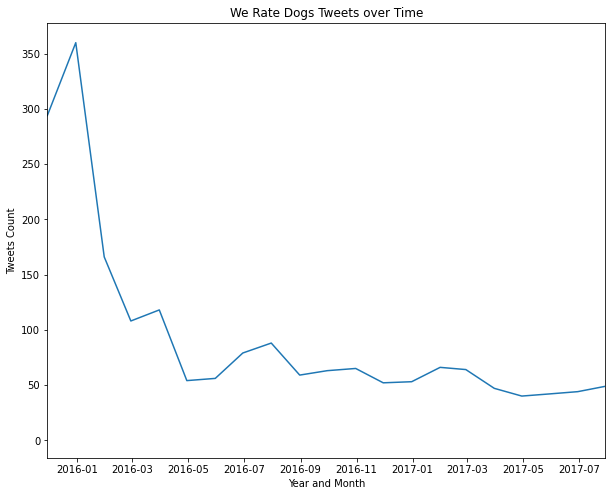

In [283]:
plt.figure(figsize=(10, 8));
plt.xlim([datetime.date(2015, 11, 30), datetime.date(2017, 7, 30)]);

plt.xlabel('Year and Month')
plt.ylabel('Tweets Count')

plt.plot(monthly_tweets.timestamp, monthly_tweets.tweet_id);
plt.title('We Rate Dogs Tweets over Time');

Over time, the number of tweets drastically reduced, peaking in January and March of 2016 before steadily declining thereafter.

#### 2. Percentage of dog stages

In [454]:
dog_stage_df = clean_twitter_archive.dog_stage.value_counts()
dog_stage_df

pupper           201
doggo             63
puppo             22
pupper,doggo       8
floofer            7
puppo,doggo        1
floofer,doggo      1
Name: dog_stage, dtype: int64

(-1.159278983907703,
 1.2075790824182484,
 -1.2276431758864068,
 1.1987340023032809)

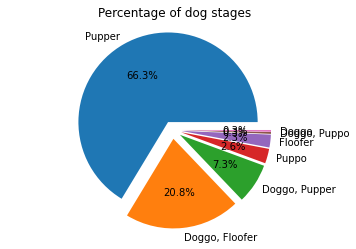

In [463]:
# Creating a pie chart
plt.pie(dog_stage_df,
        labels = ['Pupper', 'Doggo, Floofer', 'Doggo','Doggo, Pupper', 'Puppo', 'Floofer', 'Doggo, Puppo'], 
        autopct='%1.1f%%',
        explode=(0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)
        )

plt.title('Percentage of dog stages')
plt.axis('equal')

#### 3. Relationship between the number of retweets and the number of favorites


In [ ]:
plt.scatter(clean_twitter_archive.retweet_count, clean_twitter_archive.favorite_count)
plt.title('Relationship between the number of retweets and the number of favorites')
plt.xlabel('Number of Retweets')
plt.ylabel ('Number of Favorites')